In [55]:
#question 1
using ForwardDiff
using Plots
function Gradient(x,y)
# Define the function with multiple arguments
f(x, y) = 200 - x^2 - 2*y^2 
# Define functions for partial derivatives using closures
∂f_∂x(x, y) = ForwardDiff.derivative(x_ -> f(x_, y), x)
∂f_∂y(x, y) = ForwardDiff.derivative(y_ -> f(x, y_), y)

return[∂f_∂x(x, y), ∂f_∂y(x, y)]
    
end

p = -2:1:2
q = -2:1:2

U = zeros(length(p), length(q))
V = zeros(length(p), length(q))

# Evaluate curl on grid
for (i, xi) in enumerate(p)
    for (j, yi) in enumerate(q)
        Z = Gradient(xi, yi)
        U[i, j] = Z[1]
        V[i, j] = Z[2]
    end
end

# Flatten arrays for quiver
X = repeat(p, inner=length(q))
Y = repeat(q, outer=length(p))
U_flat = vec(U)
V_flat = vec(V)

# Plot
quiver(X, Y, quiver=(U_flat, V_flat),
       title="Gradient of f(x,y) = 200 - x^2 - 2y^2",
       xlabel="x", ylabel="y",
       aspect_ratio=:1)

savefig("1a.png")



In [69]:
using Plots

f(x,y) = 200 - x^2 - 2y^2
xs = range(-20, 20, length=100)
ys = range(-20, 20, length=100)

z = [max(f(xi, yi), 0) for xi in xs, yi in ys]

surface(xs, ys, z,
        xlabel="x", ylabel="y", zlabel="f(x,y)",
        title="Clipped Surface: h(x,y) = max(200 – x² – 2y², 0)",
        color=:viridis)
savefig("1c.png")

In [68]:
using Plots

f(x, y) = 200 - x^2 - (2*y^2)

x = range(-20, 20)
y = range(-20, 20)
z = [f(xi, yi) for xi in x, yi in y]  

Plots.contour(x, y, z; aspect_ratio=1,xlabel="x", ylabel="y",title="contour plot")
savefig("1b.png")


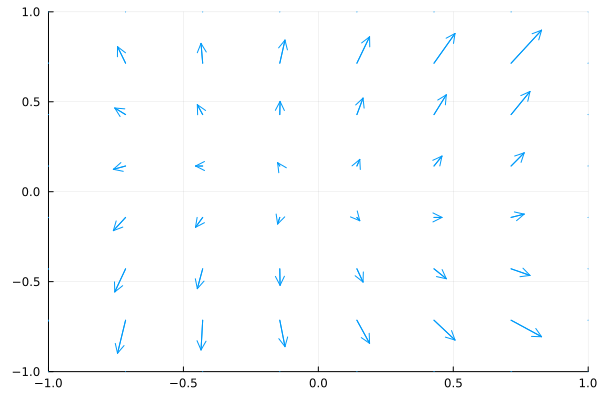

In [72]:
# Question 3
using Plots
gr()
using TensorFields
using CalculusWithJulia
V3(x, y) = [x+(exp(x) * y^2) , x + 3*y]
p = vectorfieldplot(V3,xlim=(-1,1), ylim=(-1,1))
display(p)
savefig("3a.png")

In [73]:
using CalculusWithJulia, Plots

# Vector field: f(x,y) = <e^x y², x+2y>
f(u) = [exp(u[1]) * u[2]^2, u[1] + 2u[2]]

# Curl (returns a scalar function)
c = curl(f)

# Grid
x = -2:0.2:2
y = -2:0.2:2

# Evaluate curl on grid
Z = [c([xi, yi]) for xi in x, yi in y]

# Plot
plot(x, y, Z;
        title="Curl of f(x,y) = ⟨e^x y², x+2y⟩",
        xlabel="x", ylabel="y",
        colorbar_title="curl")
savefig("3c.png")

In [74]:
using ForwardDiff

function Curl(x,y)
    f(x,y) = exp(x) * y^2
    g(x,y) = x + 2*y

# Define functions for partial derivatives using closures
    ∂f_∂y(x, y) = ForwardDiff.derivative(y_ -> f(x, y_), y)
    ∂g_∂x(x, y) = ForwardDiff.derivative(x_ -> g(x_, y), x)

    C = ∂g_∂x(x, y) - ∂f_∂y(x, y)
    return C
end

p = -2:0.2:2
q = -2:0.2:2

# Evaluate curl on grid
Z = [Curl(xi, yi) for xi in p, yi in q]

# Plot
plot(p, q, Z;
        title="Curl of f(x,y) = ⟨e^x y², x+2y⟩",
        xlabel="x", ylabel="y",
        colorbar_title="curl")

savefig("3c.png")

In [79]:
using CalculusWithJulia, Plots

# Vector field: f(x,y) = <e^x y², x+2y>
f(u) = [exp(u[1]) * u[2]^2, u[1] + 2u[2]]

# Curl (returns a scalar function)
c = divergence(f)

# Grid
x = -2:0.2:2
y = -2:0.2:2

# Evaluate curl on grid
Z = [c([xi, yi]) for xi in x, yi in y]

# Plot
plot(x, y, Z;
        title="Divergence of f(x,y) = ⟨e^x y², x+2y⟩",
        xlabel="x", ylabel="y",
        colorbar_title="curl")
savefig("3b.png")

In [77]:
using ForwardDiff

function Divergence(x,y)
    f(x,y) = exp(x) * y^2
    g(x,y) = x + 2*y

# Define functions for partial derivatives using closures
    ∂f_∂x(x, y) = ForwardDiff.derivative(x_ -> f(x_, y), x)
    ∂g_∂y(x, y) = ForwardDiff.derivative(y_ -> g(x, y_), y)
    C = ∂f_∂x(x, y) + ∂g_∂y(x, y)
    return C
end

p = -2:0.2:2
q = -2:0.2:2

# Evaluate curl on grid
Z = [Divergence(xi, yi) for xi in p, yi in q]

# Plot
plot(p, q, Z;
        title="Divergence of f(x,y) = ⟨e^x y², x+2y⟩",
        xlabel="x", ylabel="y",
        colorbar_title="curl")

savefig("3b.png")

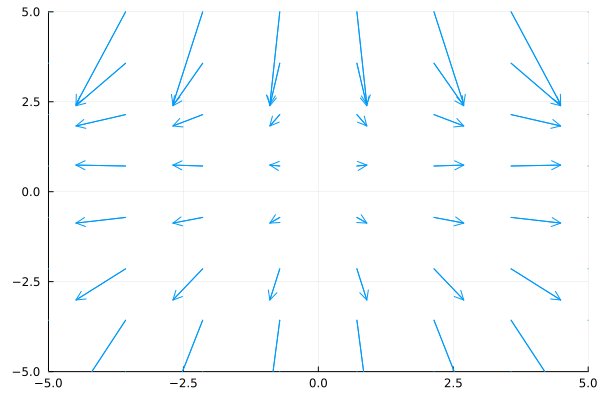

In [62]:
# Question 2
using Plots
gr()
using TensorFields
using CalculusWithJulia
V2(x, y) = [2*x , y*(1 - y)]
p = vectorfieldplot(V2,xlim=(-5,5), ylim=(-5,5),n=10)
display(p)

savefig("2a.png")

In [78]:
using ForwardDiff

function Curl(x,y)
    f(x,y) = x
    g(x,y) = -(y^2)

# Define functions for partial derivatives using closures
    ∂f_∂y(x, y) = ForwardDiff.derivative(y_ -> f(x, y_), y)
    ∂g_∂x(x, y) = ForwardDiff.derivative(x_ -> g(x_, y), x)

    C = ∂g_∂x(x, y) - ∂f_∂y(x, y)
    return C
end

p = -2:0.2:2
q = -2:0.2:2

# Evaluate curl on grid
Z = [Curl(xi, yi) for xi in p, yi in q]

# Plot
plot(p, q, Z;
        title="Curl of f(x,y) = ⟨x, -y²⟩",
        xlabel="x", ylabel="y",
        colorbar_title="curl")
savefig("2c.png")


In [60]:
using CalculusWithJulia, Plots

# Vector field: f(x,y) = <x, -y^2>
g(u) = [u[1], -1*u[2]^2]

# Curl (returns a scalar function)
c2 = curl(g)

# Grid
x = -2:0.2:2
y = -2:0.2:2

# Evaluate curl on grid
Z2 = [c2([xi, yi]) for xi in x, yi in y]

# Plot
plot(x, y, Z2;
        title="Curl of f(x,y) = ⟨x, -y^2⟩",
        xlabel="x", ylabel="y",
        colorbar_title="curl")
savefig("2c.png")

In [59]:
using CalculusWithJulia, Plots

# Vector field: f(x,y) = <x, -y^2>
g(u) = [u[1], -1*u[2]^2]

# Curl (returns a scalar function)
c2 = divergence(g)

# Grid
x = -2:0.2:2
y = -2:0.2:2

# Evaluate curl on grid
Z2 = [c2([xi, yi]) for xi in x, yi in y]

# Plot
plot(x, y, Z2;
        title="Divergence of f(x,y) = ⟨x, -y^2⟩",
        xlabel="x", ylabel="y",
        colorbar_title="curl")
savefig("2b.png")

In [56]:
using ForwardDiff

function Divergence(x,y)
    f(x,y) = x
    g(x,y) = -(y^2)

# Define functions for partial derivatives using closures
    ∂f_∂x(x, y) = ForwardDiff.derivative(x_ -> f(x_, y), x)
    ∂g_∂y(x, y) = ForwardDiff.derivative(y_ -> g(x, y_), y)
    
    C = ∂f_∂x(x, y) + ∂g_∂y(x, y)
    return C
end

p = -2:0.2:2
q = -2:0.2:2

# Evaluate curl on grid
Z = [Divergence(xi, yi) for xi in p, yi in q]

# Plot
plot(p, q, Z;
        title="Divergence of f(x,y) = ⟨x, -y²⟩",
        xlabel="x", ylabel="y",
        colorbar_title="curl")

savefig("2b.png")

In [58]:
#Question 4
using Plots
q = 2
l = 10
L = 1.25*l
Ay = 0.375*q*L
By = 0.625*q*L

function SfdBmd(q,l,L,Ay,By)
    x = 0:0.1:L
    Sf = zeros(length(x))
    for (i, xi) in enumerate(x)
        if xi<l || xi==l
            Sf[i] = Ay - (q*xi)
        else
            Sf[i] = Ay + By - (q*xi)
        end
    end

    Bm = zeros(length(x))
    for (i, xi) in enumerate(x)
        if xi<l || xi==l
            Bm[i] = (Ay*xi) - (q*xi*xi*0.5)
        else
            Bm[i] = (Ay*xi) + By*(xi-l) - (q*xi*xi*0.5)
        end
    end
        
    p1 = plot(x,Sf, xlabel = "distance from hinge (m)", ylabel = "Shear Force (N)", title = "SFD", legend = false, color=:green)
    p1 = plot!([0,0], [0,Sf[1]],color=:green)
    p1 = plot!([L,L], [0,Sf[length(x)]],color=:green)
    p1 = plot!([0,L], [0,0])

    p2 = plot(x,Bm, xlabel = "distance from hinge (m)", ylabel = "Bending Moment (Nm)", title = "BMD", legend = false, color=:green)
    p2 = plot!([0,0], [0,Bm[1]],color=:green)
    p2 = plot!([L,L], [0,Bm[length(x)]],color=:green)
    p2 = plot!([0,L], [0,0])

    plot(p1,p2 ; layout = (2,1))
end

SfdBmd(q,l,L,Ay,By)
savefig("4.png")

In [57]:
#Question 5
using Plots
q = 2
l = 10
L = 2*l
Ay = 0.4*q*l
By = 0.98*q*l
Cy = 0.42*q*l

function SfdBmd(q,l,L,Ay,By)
    x = 0:0.1:L
    Sf = zeros(length(x))
    for (i, xi) in enumerate(x)
        if xi<=0.4l
            Sf[i] = Ay
        elseif xi>0.4l && xi<=l
            Sf[i] = Ay - 0.8*q*l
        else
            Sf[i] = Ay + By - 0.8*q*l - q*(xi-l)
        end
    end

    Bm = zeros(length(x))
    for (i, xi) in enumerate(x)
        if xi<=0.4l
            Bm[i] = (Ay*xi)
        elseif xi>0.4l && xi<=l
            Bm[i] = (Ay*xi) - (0.8*q*l*(xi-0.4*l))
        else
            Bm[i] = (Ay*xi) + (By*(xi-l)) - (0.8*q*l*(xi-0.4*l)) - (q*(xi-l)*(xi-l)*0.5)
        end
    end
        
    p1 = plot(x,Sf, xlabel = "distance from hinge (m)", ylabel = "Shear Force (N)", title = "SFD", legend = false, color=:green)
    p1 = plot!([0,0], [0,Sf[1]],color=:green)
    p1 = plot!([L,L], [0,Sf[length(x)]],color=:green)
    p1 = plot!([0,L], [0,0])

    p2 = plot(x,Bm, xlabel = "distance from hinge (m)", ylabel = "Bending Moment (N)", title = "BMD", legend = false, color=:green)
    p2 = plot!([0,0], [0,Bm[1]],color=:green)
    p2 = plot!([L,L], [0,Bm[length(x)]],color=:green)
    p2 = plot!([0,L], [0,0])

    plot(p1,p2 ; layout = (2,1))
end

SfdBmd(q,l,L,Ay,By)
savefig("5.png")